**PDF-CDF**

In [8]:
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
import math

C:\Users\sudip\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

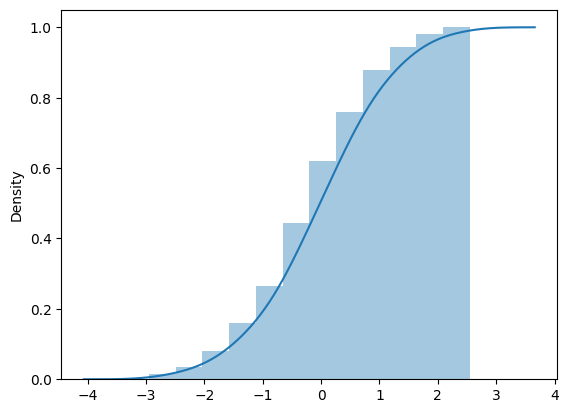

In [24]:
#CDF
x = np.random.randn(200)
kwargs = {'cumulative': True}
sns.distplot(x, hist_kws=kwargs, kde_kws=kwargs)

C:\Users\sudip\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

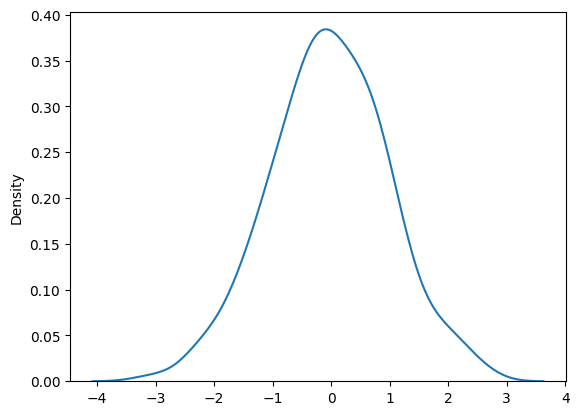

In [30]:
x = np.random.randn(200)
sns.distplot(x,hist=False)

Linear Regression

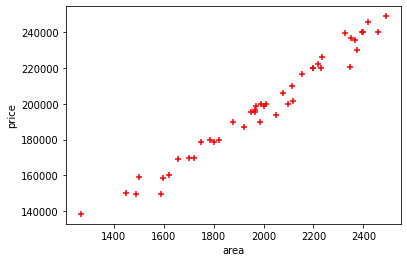

In [38]:
df = pd.read_csv("house.csv")
df
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')
new_df = df.drop('price',axis='columns')

In [44]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']],df.price) #Value of x,y axis
reg.predict([[3300]])

C:\Users\sudip\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([322382.47431637])

In [45]:
reg.coef_ #value of m

array([94.91522216])

In [46]:
reg.intercept_ #value of c

9162.241182822996

In [57]:
#y=mx+c
y=94.91522216*3300+9162.241182822996
y

322382.474310823

Ridge and Lasso Regression
https://www.pluralsight.com/guides/linear-lasso-ridge-regression-scikit-learn

In [55]:
ridge=Ridge()
ridge.fit(df[['area']],df.price)
ridge.score(df[['area']],df.price)

0.9730240478887502

In [58]:
lasso = Lasso()
lasso.fit(df[['area']],df.price)
lasso.score(df[['area']],df.price)

<IPython.core.display.Javascript object>

0.9730240478887932

In [2]:
#Multiple Regression
ds = pd.read_csv("housepred.csv", usecols=[1,2,3,4,5,6,7,8,9,10])
ds

,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,location_Whitefield
0,2.0,150.00,1672.0,3,8971.291866,1,0,0,1,0
1,3.0,149.00,1750.0,3,8514.285714,0,1,0,1,0
2,2.0,150.00,1750.0,3,8571.428571,1,0,0,1,0
3,2.0,40.00,1250.0,2,3200.000000,1,0,0,1,0
4,2.0,83.00,1200.0,2,6916.666667,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
7115,2.0,325.00,2900.0,3,11206.896552,1,0,0,1,0
7116,1.0,84.83,1780.0,3,4765.730337,1,0,0,0,0
7117,1.0,48.00,880.0,2,5454.545455,0,0,1,1,0
7118,1.0,55.00,1000.0,2,5500.000000,0,0,1,0,0


In [51]:
target_column = ['price'] #Dependent Var
predictors = list(set(list(ds.columns))-set(target_column))
ds[predictors] = ds[predictors]/ds[predictors].max() #Scaling to 0-1
ds.describe()

,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,location_Whitefield
count,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000
mean,0.524253,96.454991,0.048675,0.273908,0.169252,0.750702,0.182303,0.061938,0.792697,0.032865
std,0.256861,116.185034,0.030059,0.093502,0.073047,0.432637,0.386121,0.241060,0.405403,0.178296
min,0.000000,10.000000,0.011513,0.111111,0.035714,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,49.230000,0.036184,0.222222,0.126193,1.000000,0.000000,0.000000,1.000000,0.000000
50%,0.666667,69.000000,0.041283,0.222222,0.154796,1.000000,0.000000,0.000000,1.000000,0.000000
75%,0.666667,104.000000,0.053956,0.333333,0.189094,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,2912.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
X = ds[predictors].values
y = ds[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)
print(X_train.shape)
print(X_test.shape)

<IPython.core.display.Javascript object>

(5696, 9)
(1424, 9)


In [47]:
#Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

print("Value of co_ef: ", lr.coef_)
print("Value of intercept: ", lr.intercept_)
print("Value of accuracy: ", lr.score(X_test,y_test))

Value of co_ef:  [[ -10.22345461   -3.07960615   -6.43603669   -4.3644961   -16.67227836
  2582.40244102  812.7268967    -3.84744483 -120.80483076]]
Value of intercept:  [-123.28877732]
Value of accuracy:  0.8574048418976609


In [48]:
X_test[0,:] #1st house and all faeature of the house
lr.predict([X_test[0,:]]) #Testing the value of dataset which is not included in fit

array([[285.99928929]])

In [49]:
rd = Ridge(alpha=.1)

rd.fit(X_train,y_train)

rd.score(X_test, y_test)
rd.predict([X_test[0,:]])

array([[284.37020648]])

In [50]:
ls = Lasso(alpha=.1)

ls.fit(X_train,y_train)

ls.score(X_test, y_test)
ls.predict([X_test[0,:]])

<IPython.core.display.Javascript object>

array([279.90370258])

**Multicolinearity**

In [8]:
#Multi Colinearity
df_salary = pd.read_csv('Salary_Data.csv')
df_salary.head()
X = df_salary[['YearsExperience', 'Age']]
y = df_salary['Salary']

In [9]:
X = sm.add_constant(X) #Add constatnt with each rows
model= sm.OLS(y, X).fit()
model.summary() #Shows the summary , STD err is very high

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     323.9
Date:                Sat, 04 Jun 2022   Prob (F-statistic):           1.35e-19
Time:                        23:23:24   Log-Likelihood:                -300.35
No. Observations:                  30   AIC:                             606.7
Df Residuals:                      27   BIC:                             610.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -6661.9872   2.28e+04     -0.292      0.773   -5.35e+04    4.02e+04
YearsExperience  6153.3533   2337.092      2.633      0.014    1358.037    1.09e+04
Age              1836.0136   1285.034      1.429      0.165    -800.659    4472.686
==============================================================================
Omnibus:                        2.695   Durbin-Watson:                   1.711
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                1.975
Skew:                           0.456   Prob(JB):                        0.372
Kurtosis:                       2.135   Cond. No.                         626.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
X.iloc[:,1:].corr() #Checking co realtion between features,  Here the correlation is higher than 90 %, now drop feature by watching P value at summary
                    #The p value of age is higher than .05 , so drop age feature

,YearsExperience,Age
YearsExperience,1.000000,0.987258
Age,0.987258,1.000000


**z = (x – μ) / (σ / √n)**

In [18]:
#Hypo Test
data_wh = pd.read_csv("weight-height.csv")
data_wh['Height'].mean()

66.36755975482124

In [28]:
#Null hypo mean =70, alpha = .05 so critical value is +-1.96
sampData=data_wh['Height'][np.argsort(np.random.random(1000))[:100]]
meanSampData=sampData.mean()
hypMean=70
N=100
standPop=np.std(data_wh['Height'])
(meanSampData-hypMean)/(standPop/math.sqrt(N))


-2.3414882982229104

as calculated z score -2.34 is less than -1.96 (tabular z score), we reject the null hypothesis

if also we would have got +2.34 is greater than +1.96 we would have rejected the Null hypothesis

Observed value = -2.34

Critical value = -1.96

p-value (observed significance level)
Another way to reach a statistical conclusion in hypothesis testing problems is by using the p-value

The p-value defines the smallest probability () for which the null hypothesis can be rejected.

let say alphaa= 0.05

if p<=alpha strong evidence against the H0 , hence reject the Null Hypothesis
 
if  p>=alpha weak evidence against the H0 , hence fail to reject the Null Hypothesis
if near to .05 not sure
Example
let say observed z value is 2.34= .9906 (from Z-table)

The p-value would be 1-.9906 = 0094

using the above info we can reject the  H0 at alpha=0.05

but we will fail to reject the  at alpha = .001

as .006 > .001 but <.05
*Z- table https://www.simplypsychology.org/z-table.html*

In [35]:
#t-test t = (x – μ) / (σ / √n) , applies on numerical categories
stats.ttest_1samp(sampData,70) #pvalue<alpha , reject null hypo

Ttest_1sampResult(statistic=-3.09354114417535, pvalue=0.002570693921439892)

In [40]:
stats.ttest_1samp(sampData,69) #pvalue>alpha , dont reject null hypo

Ttest_1sampResult(statistic=0.3404867451734083, pvalue=0.7342114437523104)

In [ ]:
#For two categorical feature it neede Chi square test
